In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rawHisTransDF=pd.read_csv('Historical-transaction-data.csv')
rawStoreInfDF=pd.read_csv('Store-info.csv')
rawTestDF=pd.read_csv('Testing-data.csv')

In [3]:
rawHisTransDF.dropna(subset=['item_description','invoice_id'], inplace=True)
rawHisTransDF=rawHisTransDF.drop_duplicates()

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rawHisTransDF['item_description'] = le.fit_transform(rawHisTransDF['item_description'])
rawHisTransDF['customer_id'] = le.fit_transform(rawHisTransDF['customer_id'])
rawHisTransDF['shop_id'] = rawHisTransDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
rawStoreInfDF['shop_id'] = rawStoreInfDF['shop_id'].str.replace(r'^SHOP', '').astype(int)

rawStoreInfDF['shop_profile'] = rawStoreInfDF['shop_profile'].replace({'High': 1, 'Moderate': 2, 'Low': 3})
rawStoreInfDF['shop_profile'] = rawStoreInfDF['shop_profile'].fillna(0.0).astype(int)
rawHisTransDF['invoice_id'] = rawHisTransDF['invoice_id'].astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_13624\1220402816.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  rawHisTransDF['shop_id'] = rawHisTransDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
C:\Users\gw\AppData\Local\Temp\ipykernel_13624\1220402816.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  rawStoreInfDF['shop_id'] = rawStoreInfDF['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [5]:
# group the dataframe by the 'group' column and get the size of each group
transactions_by_shop = rawHisTransDF.groupby('shop_id').size().reset_index()

# rename columns of the new dataframe
transactions_by_shop.columns = ['shop_id', 'num_of_transactions']

In [6]:
# rawStoreInfDF['transaction_by_shop']=transactions_by_shop
rawStoreInfDF = pd.merge(rawStoreInfDF, transactions_by_shop, on='shop_id')
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,num_of_transactions
0,47,528,2,1396
1,9,676,1,3688
2,83,676,3,2981
3,117,676,3,3544
4,42,676,3,2683
...,...,...,...,...
119,87,527,0,1713
120,50,411,0,3554
121,61,699,0,2761
122,56,597,0,4846


In [7]:
output=pd.read_csv('output.csv')

In [8]:
# output = output[['item_description','transaction_date','invoice_id','customer_id','item_price']]
output = output[['shop_id', 'Daily_Sales_avg', 'revnew', 'rev_per_sqfeet', 'avd_daily_items_types_sold', 'avd_daily_transctions', 'avd_daily_custemers', 'avg_visits']]

In [9]:
# rawStoreInfDF['transaction_by_shop']=transactions_by_shop
rawStoreInfDF = pd.merge(rawStoreInfDF, output, on='shop_id')
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,num_of_transactions,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits
0,47,528,2,1396,12942.461651,697510,1321,12,19,18,164
1,47,528,2,1396,12942.461651,697510,1321,12,19,18,164
2,47,528,2,1396,12942.461651,697510,1321,12,19,18,164
3,47,528,2,1396,12942.461651,697510,1321,12,19,18,164
4,47,528,2,1396,12942.461651,697510,1321,12,19,18,164
...,...,...,...,...,...,...,...,...,...,...,...
394475,70,676,0,2392,22883.951647,1206265,1784,16,31,31,179
394476,70,676,0,2392,22883.951647,1206265,1784,16,31,31,179
394477,70,676,0,2392,22883.951647,1206265,1784,16,31,31,179
394478,70,676,0,2392,22883.951647,1206265,1784,16,31,31,179


In [10]:
rawStoreInfDF=rawStoreInfDF.drop(['avd_daily_transctions','revnew','avd_daily_custemers','num_of_transactions'], axis=1)

In [11]:
rawStoreInfDF=rawStoreInfDF.drop_duplicates()
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits
0,47,528,2,12942.461651,1321,12,164
1369,9,676,1,30764.239580,2375,21,166
4992,83,676,3,27360.354452,2184,19,172
7912,117,676,3,38445.995702,3008,20,186
11402,42,676,3,21678.661223,1677,18,160
...,...,...,...,...,...,...,...
379497,87,527,0,20176.512253,1989,13,168
381170,50,411,0,42217.525685,5191,18,208
384674,61,699,0,44238.682756,2838,17,166
387388,56,597,0,46307.680336,4179,24,182


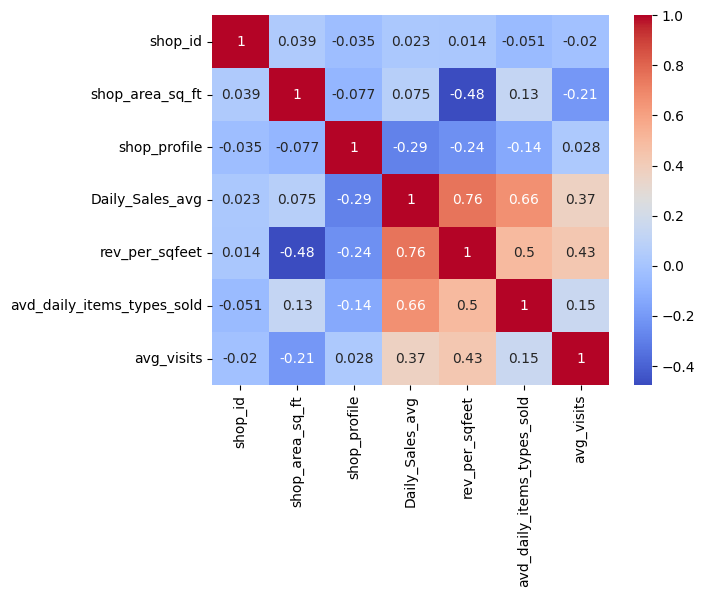

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load your data into a pandas dataframe
# df = pd.read_csv('your_data.csv')

# compute the correlation matrix
corr_matrix = rawStoreInfDF.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#### Solit to train and test data

In [13]:
# Split the DataFrame into two based on column B
TestDF = rawStoreInfDF[rawStoreInfDF['shop_profile'] == 0].drop(['shop_profile'], axis=1)
TrainDF = rawStoreInfDF[rawStoreInfDF['shop_profile'] != 0]

In [14]:
# Split Fulldata into training and testing sets
from sklearn.model_selection import train_test_split

column_name = 'shop_id'
unique_categories = TrainDF[column_name].nunique()
categories_in_dataset_1 = int(unique_categories * 0.5)
categories_in_dataset_2 = unique_categories - categories_in_dataset_1
dataset_1_categories = TrainDF[column_name].unique()[:categories_in_dataset_1]
dataset_2_categories = TrainDF[column_name].unique()[categories_in_dataset_1:]

train_data = TrainDF[TrainDF[column_name].isin(dataset_1_categories)]
test_data = TrainDF[TrainDF[column_name].isin(dataset_2_categories)]





#train_data, test_data = train_test_split(TrainDF, test_size=0.01)

In [15]:
expectedResult=test_data[['shop_id','shop_profile']]


In [16]:
shop_id_x_test = test_data['shop_id']
shop_id_x_TestDF = TestDF['shop_id']
TestDF=TestDF.drop('shop_id',axis=1)
train_data=train_data.drop('shop_id', axis=1)
test_data=test_data.drop('shop_id',axis=1)

In [17]:
X_train=train_data.drop(['shop_profile'], axis=1)
y_train=train_data['shop_profile']
X_test= test_data.drop(['shop_profile'], axis=1)
y_test=test_data['shop_profile']
X_testres = X_test.reset_index(drop=True)

In [83]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define the logistic regression model
model_random = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=10)

# Train the model on the training data
model_random.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model_random.predict(X_test)
predictions_Test_randomforest=model_random.predict(TestDF)

accu = accuracy_score(y_test, predictions)

print(accu)
# print(f1_score(y_test, predictions, average=None))



0.62


In [84]:
predDf=pd.DataFrame(predictions, columns=['shop_profile'])
predDf_Test_randomforest=pd.DataFrame(predictions_Test_randomforest, columns=['shop_profile'])

In [85]:
shop_id_x_test=shop_id_x_test.reset_index()
shop_id_x_TestDF=shop_id_x_TestDF.reset_index()

In [86]:
shop_id_x_TestDF=shop_id_x_TestDF.drop('index',axis=1)

In [87]:
# Concatenate DataFrames
concatenatedRes_df = pd.concat([shop_id_x_test, predDf], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
concatenatedRes_df_random = pd.concat([shop_id_x_TestDF, predDf_Test_randomforest], axis=1)

In [88]:
expectedResult=expectedResult['shop_profile']
concatenatedRes_df=concatenatedRes_df['shop_profile']

In [89]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.78
F1 score for class 1: 0.50
F1 score for class 2: 0.52
Average F1 score: 0.60


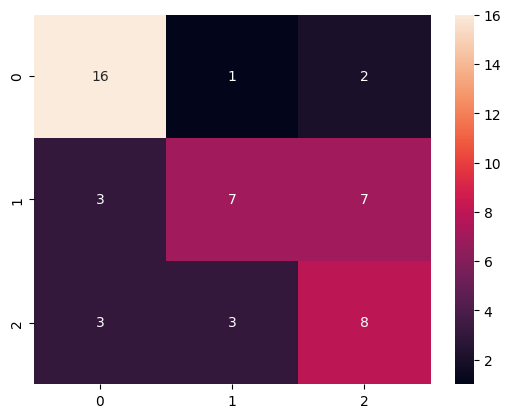

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()